### Laminar mixing layer solution

See Schlichting p. 184 (7th edition), or p. 175 (8th edition). 

For the mixing layer, $\eta = y\sqrt{U_1/\nu x}$, where $y$ is the direction of shear, x is downstream. At $\eta = +\infty$, $u=U_1$, and at $\eta = -\infty$, $u=U_2$.


Solve $$ff^{\prime\prime} + 2f^{\prime\prime\prime}=0.$$
$f = f(\eta)$, and $f^{\prime}(\eta) = u/U_1$.

Reduce this to the following three coupled ODEs:
$$f^{\prime}=h,$$
$$h^{\prime}=k,$$
$$k^{\prime}=-\frac{1}{2}fk.$$
With boundary conditions:
$$h(-\infty)=U_2/U_1,$$
$$\lim_{\eta\to\infty}(\eta - f) = -\frac{U_2}{U_1}\lim_{\eta\to -\infty}\left(\eta\frac{U_2}{U_1}-f\right).$$
$$h(+\infty)=1.$$

The second boundary condition is given in Schlichting's 8th edition. In the 7th edition, $f(0)=0$ is given (which implies that the zero streamline doesn't move.)

Solve with a shooting method.

Comparison to the spatial ODT is given below. The agreement is good for $U_2/U_1\gt 0.5$, as shown, but there is a difference between the curves for lower values of $U_2/U_1$. This is evidenced only as a shift in eta (the curves will line up if shifted).


In [28]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

L = -10
R = 10 
U2U1 = 0.50

def Fode(khf, eta):
        rates = np.empty(3)
        k = khf[0]
        h = khf[1]
        f = khf[2]
        rates[0] = -0.5*f*k
        rates[1] = k
        rates[2] = h
        return rates

def Fshoot(k0f0) :
    
    k0 = k0f0[0]
    h0 = U2U1
    f0 = k0f0[1]
    
    etaVals = np.array([L,0,R])
    
    khf_L = np.array([k0, h0, f0])
    khf_sol = odeint(Fode, khf_L, etaVals)
    
    F = np.empty(2)
    #F[0] = khf_sol[1,2])
    F[0] = R - khf_sol[2,2] + U2U1*(L*U2U1-khf_sol[0,2])
    F[1] = khf_sol[2, 1] - 1.0
    return F

k0f0 = np.array([0,-5.0 ])
#k0f0 = np.array([0,-3.40])
k0f0_sol = fsolve(Fshoot, k0f0)
F = Fshoot(k0f0_sol)
print("k(-oo) = %g" %k0f0_sol[0])
print("h(-oo) = %g" %U2U1)
print("f(-oo) = %g" %k0f0_sol[1])
print("Fshoot should be 0: %g, %g" %(F[0], F[1]))

k(-oo) = 2.23429e-07
h(-oo) = 0.5
f(-oo) = -5.18565
Fshoot should be 0: -6.07736e-12, 5.55334e-13


k(+oo) = -4.20621e-10
h(+oo) = 1
f(+oo) = 10.0928


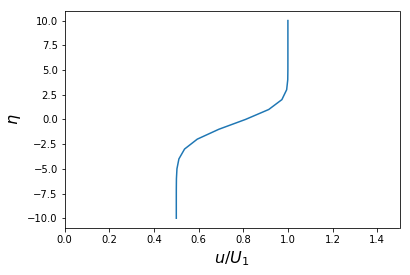

In [50]:
etaVals = np.linspace(L,R,21)
    
khf0 = np.array([k0f0_sol[0], U2U1, k0f0_sol[1]])
khf = odeint(Fode, khf0, etaVals)
print("k(+oo) = %g" %khf[-1,0])
print("h(+oo) = %g" %khf[-1,1])
print("f(+oo) = %g" %khf[-1,2])

uU1 = khf[:,1]

plt.plot(uU1,etaVals,'-')
plt.xlim([0.0,1.5])
plt.xlabel(r"$u/U_1$", fontsize=16)
plt.ylabel(r"$\eta$", fontsize=16);

### Compare to ODT solution

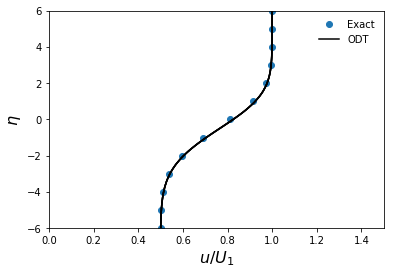

In [51]:
data_path = "../../data/ML/data/data_00000/"     # SET THIS APPROPRIATELY
flist = [f"{data_path}dmp_0000{i}.dat" for i in range(2,9,2)]
times = [0.02, 0.04, 0.06, 0.08]

plt.plot(uU1, etaVals,'o')
plt.xlim([0,1.5])
plt.ylim([-6,6])
for i in range(len(flist)):
    data = np.loadtxt(flist[i])
    y = data[:,0]
    u = data[:,4]
    eta_odt = y*np.sqrt(1/1/times[i])
    uU1_odt = u/1
    plt.plot(uU1_odt, eta_odt+0.0, 'k-')
plt.xlabel(r"$u/U_1$", fontsize=16)
plt.ylabel(r"$\eta$", fontsize=16)
plt.legend(('Exact', 'ODT'), frameon=False);